##Basic Statistics Youtube

In [10]:
##Converting CSV files with comments I am getting from Netlytic to Json
import pandas as pd
import os 

##Open directory to read CSV files
dir_to_read = 'user_research/CSV'
files_to_read = os.listdir(dir_to_read)

df = pd.DataFrame()

for filename in files_to_read:
    # df has 24 columns, but only the first 10 seem to have any data(?)
    this_file = pd.read_csv(f'{dir_to_read}/{filename}')[0:10]
    df = df.append(this_file)


#df.to_json(r'CHRISFREELANCER/CHRIS_FREELANCER_HOWTO_BE.json', orient = 'records', lines = True)

TypeError: listdir() takes at most 1 argument (2 given)

In [4]:
df

,Unnamed: 0,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,...,description,description_cleaned,guid,id,likecount,link,pubdate,replycount,title,to
"(1, Granada Crain, very pretty, Ugww0dmS_Jqeuzz7nLV4AaABAg, nan, 0, https://www.youtube.com/watch?v=Uj3LVUfNgO0&amp;lc=Ugww0dmS_Jqeuzz7nLV4AaABAg, 2020-09-14 08:07:21, 0, very pretty, nan)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2, Purple Flower, How is babysitter and housesitter are digital jobs?, UgzhqJM0PgZ4dHpB26J4AaABAg, nan, 0, https://www.youtube.com/watch?v=Uj3LVUfNgO0&amp;lc=UgzhqJM0PgZ4dHpB26J4AaABAg, 2020-08-31 15:58:05, 0, How is babysitter and housesitter are digital jobs?, nan)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3, Soy Remoto, ¡Hola! Si estáis buscando trabajo en remoto y en español, podéis echar un vistazo a nuestra nueva web https://soyremoto.es/ Esperamos que os sea muy útil :), UgyW0ACvPOFRepGVQUR4AaABAg, nan, 0, https://www.youtube.com/watch?v=Uj3LVUfNgO0&amp;lc=UgyW0ACvPOFRepGVQUR4AaABAg, 2020-08-27 13:19:23, 0, ¡Hola! Si estáis buscando trabajo en remoto y en español, podéis echar un vistazo a nuestra nueva web https://soyremoto.es/ Esperamos que os sea muy útil :), nan)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(4, Wander Van, The video title is totally wrong!! and misleads!! Everything you mentioned takes skills!!, Ugxm3e_-vrRiPpD92Cx4AaABAg, nan, 1, https://www.youtube.com/watch?v=Uj3LVUfNgO0&amp;lc=Ugxm3e_-vrRiPpD92Cx4AaABAg, 2020-08-10 09:53:23, 0, The video title is totally wrong!! and misleads!! Everything you mentioned takes skills!!, nan)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(5, Culinary Days Karachi Catering, Nice..., UgxCaO9C7ak1Av3MoqJ4AaABAg, nan, 0, https://www.youtube.com/watch?v=Uj3LVUfNgO0&amp;lc=UgxCaO9C7ak1Av3MoqJ4AaABAg, 2020-08-02 22:47:10, 0, Nice..., nan)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(6, VC Virtual Services - HEALTH WEALTH GREEN BARLEY, Hi, thank you for sharing this., UgynUJLgnSI8I9rLPFZ4AaABAg, nan, 0, https://www.youtube.com/watch?v=Uj3LVUfNgO0&amp;lc=UgynUJLgnSI8I9rLPFZ4AaABAg, 2020-07-31 21:39:03, 0, Hi, thank you for sharing this., nan)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(7, На Досуге в Канаде - Anvar CANADA, There is one more niche where people can make money online - it is called Crowdtesting. You can find more information here: https://www.youtube.com/watch?v=0xlHItOw-TU, Ugzz6wOA58BRelPz5x14AaABAg, nan, 0, https://www.youtube.com/watch?v=Uj3LVUfNgO0&amp;lc=Ugzz6wOA58BRelPz5x14AaABAg, 2020-07-29 18:06:45, 0, There is one more niche where people can make money online - it is called Crowdtesting. You can find more information here: https://www.youtube.com/watch?v=0xlHItOw-TU, nan)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(8, Igor Sidelkovsky, Excellent video content! Forgive me for the intrusion, I am interested in your thoughts. Have you tried - Chiveard Discovering Potential Framework (google it)? It is a great exclusive guide for finding your true calling and achieving success minus the normal expense. Ive heard some extraordinary things about it and my best friend Jordan after a lifetime of fighting got great results with it., UgyFEbPzPMGu-fXl0RB4AaABAg, nan, 0, https://www.youtube.com/watch?v=Uj3LVUfNgO0&amp;lc=UgyFEbPzPMGu-fXl0RB4AaABAg, 2020-07-05 14:52:58, 0, Excellent video content! Forgive me for the intrusion, I am interested in your thoughts. Have you tried - Chiveard Discovering Potential Framework (google it)? It is a great exclusive guide for finding your true calling and achieving success minus the normal expense. Ive heard some extraordinary things about it and my best friend Jordan after a lifetime of fighting got gr

In [ ]:
jsonfile = open('user_research/JSON/DN_INFLUENCER.json', 'w')

# fieldnames = ("id","author","description","guid","to","likecount","link","pubdate","replycount","title")

author_map_filename = 'author_map.json'

if os.path.exists(author_map_filename):
    print('Using existing author map')
    with open(author_map_filename, 'r') as f:
        author_map = json.load(f)
else:
    print('Creating new author map. Results will not be joinable with previous data!')
    author_map = dict()
    
## There are some hidden files to sync Dropbox, avoid them
for filename in files_to_read:
    if filename[-4:] != '.csv':
        continue
        
    csvfile = open(f'{dir_to_read}/{filename}', 'r')
    
    reader = csv.DictReader( csvfile) #, fieldnames)

##Dump reader object to json string, looping through
    try:
        for i, row in enumerate(reader):
            author_id = author_map.get(row['author'])
            if author_id is None:
                author_id = str(uuid.uuid1())
                author_map[row['author']] = author_id
                
            row['author'] = author_id
            row['video_id'] = video_id(row['link'])
            json.dump(row, jsonfile)
            jsonfile.write('\n')
    except Exception:
        print(f'Failed to read {filename}, row {i}')
        
## Writing dict to json
with open(author_map_filename, 'w') as f:
    json.dump(author_map, f)

In [43]:
df[0:5]

,id,author,description,guid,to,likecount,link,pubdate,replycount,title
0,1,Saadon Aksah,Thanks! This is very informative! 😍,UgwKubNjHIYR-0ZJ5OB4AaABAg,NaN,0,https://www.youtube.com/watch?v=pdGW2U9z6yA&am...,2020-09-10 00:05:16,0,Thanks! This is very informative! 😍
1,2,Janosch,Not recommending a formal education – that\'s ...,UgzGxHspeeSn7PCicIZ4AaABAg,NaN,0,https://www.youtube.com/watch?v=pdGW2U9z6yA&am...,2020-09-05 03:59:01,0,Not recommending a formal education – that\'s ...
2,3,Money Secrets,Great VDO.. Its getting more difficult though ...,Ugz-2dphPQttftqZNHp4AaABAg,NaN,0,https://www.youtube.com/watch?v=pdGW2U9z6yA&am...,2020-09-03 13:42:35,0,Great VDO.. Its getting more difficult though ...
3,4,Siduo Zhang,"All these nomads feed on the digital economy, ...",UgxePOEFXm7LnzkTGzV4AaABAg,NaN,0,https://www.youtube.com/watch?v=pdGW2U9z6yA&am...,2020-08-31 10:06:36,0,"All these nomads feed on the digital economy, ..."
4,5,Pedider Linguaphile,Gr8 content! But you didn\'t mention visas at ...,Ugw1Yzkm2biIcLNzM354AaABAg,NaN,0,https://www.youtube.com/watch?v=pdGW2U9z6yA&am...,2020-08-16 20:06:01,0,Gr8 content! But you didn\'t mention visas at ...


In [51]:
##Running basic statistics in Numpy
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

print(f'Total Number of posts: {len(df)}')
print(f'Number of unique users: {len(df.id.unique())}')
message_lengths = df.title.apply(lambda x: 0 if type(x) == float else len(x))
print(f'Mean post length: {np.mean(message_lengths)}')
print(f'Total Number of likes: {sum(df.likecount)}')
print(f'Total Number of replies:{sum(df.replycount)}')


Total Number of posts: 758
Number of unique users: 758
Mean post length: 140.967018469657
Total Number of likes: 1852
Total Number of replies:344


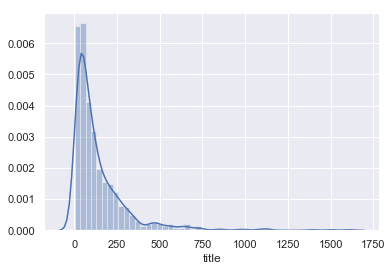

In [47]:
##Generating a plot for message length
sns.distplot(message_lengths)
plt.show()